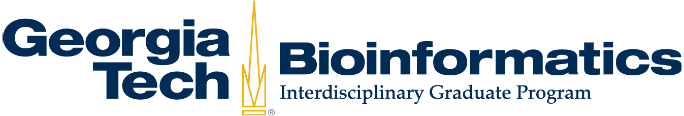

<div class="alert alert-block alert-info">
    <h1>BIOL 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 2 (Read Mapping) starter notebook</h2>
    <h3>Deadline: 11:59PM, October 1st, 2024</h3>
</div>

<div class="alert alert-block alert-warning">
    <h3>Environment configuration</h3>
    <p><b>Node type: </b>Intel(R) Xeon(R) Gold 6226 CPU @ 2.70GHz<br>
    <b>Cores: </b>24 (12 cores per socket, 2 sockets)<br>
    <b>Memory: </b>754GB<br>
    <b>Storage: </b>50TB (network-mounted) and 1.4TB (local)<br>
    <b>Estimated time: </b>1 hour 30 Minutes <br></p>
</div>


---

# **1. Getting ready for read alignment**
### *Total Questions: 5*
### *Total Points: 2+5+5+5+3 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Do you have the post-QCed fastq file from the assigned 1000 Genomes individual</h3>
    <p>We will start from where we left off in Project #1. We want to make sure that we are using the correct QCed fastq files.</p>
</div>

In [13]:
#To show the two trimmed fastq files

!ls -lh

total 6.0G
drwxr-xr-x. 2 imusayeva3 gtperson 4.0K Mar 17  2021 bwa-mem2-2.2.1_x64-linux
-rw-r--r--. 1 imusayeva3 gtperson 3.0G Aug 21  2018 hg19.fa
-rw-r--r--. 1 imusayeva3 gtperson  52K Sep 22 09:52 Project2-ReadMapping.ipynb
-rw-r--r--. 1 imusayeva3 gtperson 1.5G Sep 22 08:45 SRR081224_1_trimmed.fastq.gz
-rw-r--r--. 1 imusayeva3 gtperson 1.6G Sep 22 08:45 SRR081224_2_trimmed.fastq.gz


<div class="alert alert-block alert-warning">
    <h3>1.2 Download the correct reference genome for alignment step</h3>
    <p>Please locate and donwload the human reference genome fasta file in build GRCh38</p>
</div>

In [ ]:
#We downloaded the human reference genome fasta file from UCSC’s Golden Path using this link: http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz. 
#We then ran a wget to grab it and then used gunzip to decompress the file

#Download human reference genome (hg38) from golden path
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/latest/hg38.fa.gz 
!gunzip hg38.fa.gz

#To see size and location of reference file
!ls -lh

--2024-09-27 10:57:29--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/latest/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1012013082 (965M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 965.13M  14.3MB/s    in 60s     

2024-09-27 10:58:31 (16.0 MB/s) - ‘hg38.fa.gz’ saved [1012013082/1012013082]

gzip: hg38.fa already exists; do you wish to overwrite (y or n)? 

<div class="alert alert-block alert-warning">
    <h3>1.3 Find out about your reference genome file.</h3>
    <p>Does your reference fasta file have more information that just ACGT nucleotides? Please check if your fastq sequence have Ns or small/upper case ACGT nnucleotides.</p>
</div>

In [1]:
#Glance at the first few lines of the hg19.fa file
!head -n 20 hg38.fa
#The reference file has more than just upper case ACTG nucleotides, there are ambiguous nucleotides like N and lowercase actg nucleotides. 

>chr1
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


<div class="alert alert-block alert-warning">
    <h3>1.4 Using 1-3 lines, explain what upper case ACGT, lower case ACGT, and NNNs mean in your reference fasta file.</h3>
    <p>Hint: check readme files.</p>
</div>

In [7]:

#Uppercase ACGT represents normal, high-confidence bases in the genome. 
#Lowercase acgt is used for soft-masked regions, which are typically repetitive sequences but still known with confidence. 
#NNNs are used for hard-masked regions where no reliable sequence information is available, representing gaps in the assembly.

<div class="alert alert-block alert-warning">
    <h3>1.5 Select a tool for read alignment.</h3>
    <p>We have demonstrated bwa and minimap2 in the class. If you want to use some other tool, reach out to one of the TAs to get that tool installed on PACE-ICE.</p>
</div>

In [27]:
#Download bwa mapping Tool

#Download and extract the precompiled BWA-MEM2 binaries
!curl -L https://github.com/bwa-mem2/bwa-mem2/releases/download/v2.2.1/bwa-mem2-2.2.1_x64-linux.tar.bz2 \
  | tar jxf -


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2597k  100 2597k    0     0  3583k      0 --:--:-- --:--:-- --:--:--     0


#### **2. Read alignment**
### *Total Questions: 4*
### *Total Points: 10+15+5+20 = 50*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Steps before mapping</h3>
    <p>You already have a fasta file, but sometimes alignment tools do not accept fasta files directly. Please read your aligners documentation and run all the preliminary steps require to run the mapping command from your aligner.</p>
</div>

<div class="alert alert-block alert-info">
    <p>Preliminary commands go in the cells below. Please use appropriate comments and markdown texts to explain what your command is doing.</p>
</div>

In [13]:
#We used an sbatch script (bwa.sbatch) to index the reference genome file. This allowed us to submit a batch job to SLURM, which is a workload manager used to allocate resources on a computing cluster. 
#The sbatch script is running the bwa-mem2 tool to index the human genome reference file (hg38.fa). 
#We specified the sbatch script use 120 GB of memory and 2 CPU cores because SLURM ensures efficient use of cluster resources, and it's essential to specify the computational resources (like memory, CPU, and time) that the job will require. 
#We set higher memory limits because genome indexing can be memory-intensive, especially for large files like hg38.fa. The partition is defined as pace-cpu, which is suitable for CPU-based jobs rather than GPU-based workloads.

total 7.7G
drwxr-xr-x.  5 imusayeva3 gtperson  12K Sep 22 10:42 bwa
-rw-r--r--.  1 imusayeva3 gtperson 3.2G Oct 27  2022 hg38.fa
-rw-r--r--.  1 imusayeva3 gtperson  22K Sep 22 11:26 hg38.fa.amb
-rw-r--r--.  1 imusayeva3 gtperson  34K Sep 22 11:26 hg38.fa.ann
-rw-r--r--.  1 imusayeva3 gtperson  31K Sep 22 11:48 hg38.fa.fai
-rw-r--r--.  1 imusayeva3 gtperson 1.6G Sep 22 11:26 hg38.fa.pac
-rw-r--r--.  1 imusayeva3 gtperson  72K Sep 22 11:36 Project2-ReadMapping.ipynb
drwxr-xr-x. 10 imusayeva3 gtperson  12K Sep 22 11:46 samtools-1.21
-rw-r--r--.  1 imusayeva3 gtperson 8.8M Sep 12 11:28 samtools-1.21.tar.bz2
-rw-r--r--.  1 imusayeva3 gtperson 1.5G Sep 22 08:45 SRR081224_1_trimmed.fastq.gz
-rw-r--r--.  1 imusayeva3 gtperson 1.6G Sep 22 08:45 SRR081224_2_trimmed.fastq.gz


Screenshot of **bwa.sbatch** is shown below.

![HG00102 Screenshot](resim1.png)

<div class="alert alert-block alert-warning">
    <h3>2.2 Run mapping.</h3>
    <p>This should be one or two lines of code but it's important to understand what the options are doing.</p>
</div>

In [32]:
#We used another sbatch script (bwa_alignment.sbatch) to align the two FASTQ files (SRR081224_1_trimmed.fastq.gz and SRR081224_2_trimmed.fastq.gz) to the reference genome (hg38.fa) using bwa-mem2.avx2.
#We specified the sbatch script use  24 CPU cores, 200 GB of memory, 12 hours of runtime for the job. SLURM will manage resource allocation and notify me by email when the job starts, ends, or fails. 
#We are using the AVX2 version (of BWA-mem2) because it is compatible with the system's CPU. 
#This approach ensures we maximize computing resources without manually monitoring the alignment process.

#check files
!ls -lh

total 35G
drwxr-xr-x.  5 imusayeva3 gtperson  12K Sep 22 14:33 bwa
-rw-r--r--.  1 imusayeva3 gtperson 1.2K Sep 22 16:24 bwa_alignment.sbatch
drwxr-xr-x.  2 imusayeva3 gtperson 4.0K Mar 17  2021 bwa-mem2-2.2.1_x64-linux
-rw-r--r--.  1 imusayeva3 gtperson  32K Sep 22 16:28 bwa_mem2_alignment.err
-rw-r--r--.  1 imusayeva3 gtperson  654 Sep 22 16:28 bwa_mem2_alignment.log
-rw-r--r--.  1 imusayeva3 gtperson  579 Sep 22 16:04 bwa_mem2_index.err
-rw-r--r--.  1 imusayeva3 gtperson  819 Sep 22 16:04 bwa_mem2_index.log
-rw-r--r--.  1 imusayeva3 gtperson 1.1K Sep 22 16:08 bwa.sbatch
-rw-r--r--.  1 imusayeva3 gtperson 3.2G Oct 27  2022 hg38.fa
-rw-r--r--.  1 imusayeva3 gtperson 6.2G Sep 22 15:43 hg38.fa.0123
-rw-r--r--.  1 imusayeva3 gtperson  22K Sep 22 15:37 hg38.fa.amb
-rw-r--r--.  1 imusayeva3 gtperson  34K Sep 22 15:37 hg38.fa.ann
-rw-r--r--.  1 imusayeva3 gtperson  10G Sep 22 16:04 hg38.fa.bwt.2bit.64
-rw-r--r--.  1 imusayeva3 gtperson  31K Sep 22 11:48 hg38.fa.fai
-rw-r--r--.  1 imusayeva3 

Screenshot of **bwa_alignment.sbatch** is shown below. We also copy and pasted the sbatch script code into a markdown cell because terminal cuts of part of the script.

![HG00102 Screenshot](resim2.png)

#!/bin/bash
#SBATCH --job-name=bwa_mem2_alignment         # Job name
#SBATCH --output=bwa_mem2_alignment.log       # Output log file
#SBATCH --error=bwa_mem2_alignment.err        # Error log file
#SBATCH --ntasks=1                            # Number of tasks 
#SBATCH --cpus-per-task=24                    # Number of CPU cores to use
#SBATCH --mem=200G                            # Memory limit
#SBATCH --time=12:00:00                       # Maximum execution time 
#SBATCH --partition=pace-cpu                  # Use correct partition

# Email notifications (BEGIN, END, FAIL)
#SBATCH --mail-user=imusayeva3@gatech.edu
#SBATCH --mail-type=BEGIN,END,FAIL

# Set the path to BWA-MEM2 and reference files
BWA_MEM2_DIR="/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project2/bwa-mem2-2.2.1_x64-linux"
REFERENCE_DIR="/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project2"
REFERENCE_FILE="hg38.fa"
FASTQ1="SRR081224_1_trimmed.fastq.gz"
FASTQ2="SRR081224_2_trimmed.fastq.gz"


# Run BWA-MEM2 alignment using AVX2
$BWA_MEM2_DIR/bwa-mem2.avx2 mem -t 24 ${REFERENCE_DIR}/${REFERENCE_FILE} ${REFERENCE_DIR}/${FASTQ1} ${REFERENCE_DIR}/${FASTQ2} > SRR081224.sam


In [33]:
# Explanation for the alignment sbatch script commands used:
# 
# bwa-mem2.avx2: This specifies the use of the AVX2-optimized version of the bwa-mem2 tool, 
#                ensuring compatibility and performance based on the system's CPU architecture.
#
# mem: This is the command used for mapping or aligning the sequencing reads (FASTQ files) 
#      against the reference genome (FASTA file). It is optimized for long-read sequencing.
#
# -t 24: The "-t" flag sets the number of CPU threads to use for the task. Here, 24 CPU cores 
#        are used to parallelize the process, improving speed and efficiency.
#
# ${REFERENCE_DIR}/${REFERENCE_FILE}: This points to the reference genome file (hg38.fa), 
#                                     which is used for aligning the reads.
#
# ${REFERENCE_DIR}/${FASTQ1} and ${REFERENCE_DIR}/${FASTQ2}: These specify the paths to 
#                                                          the paired-end FASTQ files that 
#                                                          contain the sequencing reads to be aligned.

<div class="alert alert-block alert-warning">
    <h3>2.3 Post alignment evaluation.</h3>
    <p>How many lines does your SAM file have?</p>
</div>

In [34]:
#Count the number of lines in the SAM file
!wc -l SRR081224.sam


44623744 SRR081224.sam


<div class="alert alert-block alert-warning">
    <h3>2.4 Look at the 7th read that maps successfully in your SAM file and answer the following questions. (10+10+10+10 = 40Points)</h3>
    <p>1. What chromosome does it align to?</p>
    <p>2. What is the CIGAR string for this read? Explain the CIGAR string in detail.</p>
    <p>3. Does this read have a paired read which also aligns successfully?</p>
    <p>4. If the paired read aligns successfully, what does the CIGAR string for this read convey?</p>
</div>

In [42]:
# 1. What chromosome does it align to?
!awk '$1 !~ /^@/ && $3 != "*"' SRR081224.sam | awk '{print $3}' | sed -n '7p'

chr17


In [40]:
#2. What is the CIGAR string for this read? Explain the CIGAR string in detail.
!awk '$3 != "*"' SRR081224.sam | head -10

!awk '$1 !~ /^@/ && $3 != "*"' SRR081224.sam | sed -n '7p'


@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173
@SQ	SN:chr14_KI270722v1_random	LN:194050
SRR081224.163	99	chr17	39187400	60	82M	=	39187496	178	TCAGAAGCCTTTTGTCCACTAGCACTCTGGCTGCCTGTCTCCTGGCACCCACTTCCCTGCCCTCCCTCCAGATACCCACCTC	IIIHIIHIIIIIIIHIIGIHIIIIIIIEHHIHFIIDIEIEIHEFHIHHIIHIBFIHIDEEGGBHHHAED9BBBDDDDEGAAE	NM:i:0	MD:Z:82	MC:Z:82M	AS:i:82	XS:i:20


CIGAR strings, "Compact Idiosyncratic Gapped Alignment Reports", are a compact method of showing the alignment of a query sequence to a refernce genome. CIGAR string are used by SAM and BAM file formats.
    I = insertions
    D = deletions
    M = matches
    X = mismatch
    N = gap
The CIGAR string for the read in question is 82M. This CIGAR string indicates that the entire read, consisting of 82 bases, has been aligned perfectly to the reference sequence with 82 matches (M). The absence of any other symbols like insertions (I), deletions (D), or soft clipping (S) suggests that this read was fully mapped without any gaps, soft clipping, or mismatches, aside from a perfect alignment over its length. The associated SAM flags (99) further confirm that this is a properly paired read mapped in the correct orientation.

In [43]:
#3. Does this read have a paired read which also aligns successfully?
!awk '$1 !~ /^@/ && $3 != "*"' SRR081224.sam | awk '{print $2}' | sed -n '7p'

99


The FLAG value **99** means that the read has a paired read that also aligns successfully. Here's a breakdown of the FLAG value **99**:

- **0x1**: The read is paired.
- **0x2**: Both reads in the pair are properly aligned.
- **0x40**: This is the first read in the pair.
- **0x10**: The read is aligned to the reverse strand.

0x1 (paired-end read) = 000000001 (binary) = 1 (decimal)
0x2 (properly paired) = 000000010 (binary) = 2 (decimal)
0x40 (first read in the pair) = 001000000 (binary) = 64 (decimal)
0x10 (mapped to the reverse strand) = 000010000 (binary) = 16 (decimal)
When we add these decimal values together:

1 (0x1) + 2 (0x2) + 64 (0x40) + 16 (0x10) = 99

Thus, **yes**, the 7th read has a paired read that aligns successfully.

In [44]:
#4. If the paired read aligns successfully, what does the CIGAR string for this read convey?
!awk '$1 !~ /^@/ && $3 != "*"' SRR081224.sam | awk '{print $6}' | sed -n '8p'

82M


The CIGAR string for the paired read is **82M**, which indicates that:

- The entire read (82 bases) aligns to the reference genome as a **match** (or mismatch), with no insertions, deletions, or clipping.

### What this conveys:
- Both reads in the pair align to the reference genome with **82 bases matching the reference sequence**.
- Since both the original read and the paired read have CIGAR strings of **82M**, it suggests a clean, straightforward alignment without any gaps, insertions, or deletions.


# **3. Read alignment evaluation**
### *Total Questions: 5*
### *Total Points: 2+5+10+3+10 = 30*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Samtools is a classic bioinformatics tools.</h3>
    <p>Check if you have samtools installed on your environment.</p>
</div>

In [36]:
#Run the "samtools" command to make sure it does not say "samtools not found".

!samtools --version

samtools 1.17
Using htslib 1.17
Copyright (C) 2023 Genome Research Ltd.

Samtools compilation details:
    Features:       build=configure curses=yes 
    CC:             /opt/conda/conda-bld/samtools_1684314010921/_build_env/bin/x86_64-conda-linux-gnu-cc
    CPPFLAGS:       -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /storage/ice-shared/biol6150/SharedEnvironment/biol6150/include
    CFLAGS:         -Wall -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /storage/ice-shared/biol6150/SharedEnvironment/biol6150/include -fdebug-prefix-map=/opt/conda/conda-bld/samtools_1684314010921/work=/usr/local/src/conda/samtools-1.17 -fdebug-prefix-map=/storage/ice-shared/biol6150/SharedEnvironment/biol6150=/usr/local/src/conda-prefix
    LDFLAGS:        -Wl,-O2 -Wl,--sort-common -Wl,--as-needed -Wl,-z,relro -Wl,-z,now -Wl,--disable-new-dtags -Wl,--gc-sections -Wl,--allow-shlib-undefined -Wl,-rpath,/storage/ice-shared/biol6150/S

<div class="alert alert-block alert-warning">
    <h3>3.2 Is your SAM file sorted by coordinates?</h3>
    <p>SAM or BAM (which we will create later) can be sorted by the read name or read coordinate. Look at your SAM file and see if you can run a Samtools command to find out if your file is sorted. (Hint: Google your question)</p>
</div>

In [47]:
#Check is the SAM file is sorted.
!awk '$1 !~ /^@/ && $3 != "*"' SRR081224.sam | head -10 | awk '{print $4}'

74696694
74696550
26033571
26033690
64424986
64425205
39187400
39187496
618782
618665


**The SAM file is unsorted.**


#### How I reached the answer:

To determine if the SAM file was sorted by coordinates, I examined the **position field (4th column)** of the first 10 aligned reads. A SAM file that is sorted by coordinates will have positions that strictly increase for each chromosome. I used the following steps to extract and inspect the position data.

#### Commands Used:

**Extract the 4th column (positions) of the first 10 aligned reads**:
   This command filters out the header lines (which start with `@`) and extracts only the aligned reads, showing the first 10 positions. I then checked if they were in ascending order.

   ```bash
   awk '$1 !~ /^@/ && $3 != "*"' SRR081224.sam | head -10 | awk '{print $4}'


<div class="alert alert-block alert-warning">
    <h3>3.3 Sort your SAM file?</h3>
    <p>Sort your SAM file by genomic coordinates,</p>
    <p>When you run this command, what is the output format of your result file?</p>
    <h4>Tweak samtools and change your sorted SAM file's output to SAM. (Hint: You should be able to read the file using simple cat or less)</h4>
</div>

In [55]:
#Run the sort command here.

#Sort the SAM file by genomic coordinates:
!samtools sort -o SRR081224_sorted.sam SRR081224.sam

[bam_sort_core] merging from 14 files and 1 in-memory blocks...


In [56]:
#Head your sorted SAM file here. Show the first 5 lines.
!head -n 5 SRR081224_sorted.sam

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316


## The output format of the result file is Sam file.

<div class="alert alert-block alert-warning">
    <h3>3.4 Convert your SAM file to a BAM file.</h3>
    <p>This should be a single one line command.</p>
</div>

In [57]:
#Write the command run "ls -lh" to show the size and location of the file.
!samtools view -S -b SRR081224_sorted.sam > SRR081224.bam && ls -lh SRR081224.bam

-rw-r--r--. 1 imusayeva3 gtperson 2.6G Sep 22 18:12 SRR081224.bam


<div class="alert alert-block alert-warning">
    <h3>3.5 Statistics of your SAM file.</h3>
    <p>1.How many total raw sequences does your SAM file have?</p>
    <p>2.How many total reads are mapped in your SAM file?</p>
</div>

In [58]:
#Total raw sequences in the sorted SAM file:
!awk '$1 !~ /^@/' SRR081224_sorted.sam | wc -l

#Total mapped reads in the sorted SAM file:
!awk '$3 != "*"' SRR081224_sorted.sam | wc -l

44623032
44606102


In the context of high-throughput sequencing data, having **16,930 unmapped reads** out of a total of **44,623,032 reads** is not a large number. Here's why:

- The percentage of unmapped reads is calculated as:

  ```bash
  (16,930 / 44,623,032) * 100 ≈ 0.038%
  
#### This means that only 0.038% of the total reads are unmapped.
